## Определение
Выпуклой оболочкой $CH(P)$ множества точек $P$ называется пересечение выпуклых множеств, содержащих все точки из $P$.


## Алгоритм Джарвиса
По-другому этот алгоритм называется "алгоритм заворачивания подарка". Он заключается в том, что мы ищем выпуклую оболочку последовательно, против часовой стрелки, начиная с определенной точки.


### Алгоритм
1. Берем самую левую точку $p_0$, если таких несколько &mdash; самую нижнюю из них.
2. За $O(n)$ перебираем все точки, берем точку с минимальным полярным углом относительно $p_0$, если таких несколько, берем ближайшую к $p_0$.
3. Добавляем выбранную точку в оболочку, проделываем то же самое с ней и т. д.
4. Если в какой-то момент найденная на шаге 2 точка совпала с $p_0$, то останавливаемся.

Пояснение: Пусть мы  на шаге 2 хотим проверить, что $p_j$ имеет имеет меньший угол, чем $p_i$. Это эквивалентно тому, что предикат поворота $turn(p_0, p_i, p_j) < 0$.
![Пример](images/jarvis.png)


### Корректность
> Алгоритм Джарвиса строит корректную выпуклую оболочку.


$\triangleright$

<div style="padding-left:40px">
Пусть после завершения Джарвиса осталась точка $P$, не лежащая внутри полученной оболочки.
Это значит, что она лежит справа от некоторого ребра $AB$ (считаем, что ребра оболочки упорядочены против часовой стрелки, так что все внутренние точки лежат слева от них).
Но тогда $P$ меньше по повороту относительно $A$, чем $B$. Значит, мы должны были выбрать ее, а не $B$, для построения очередного ребра оболочки, когда мы рассматривали точку $A$. Противоречие.
Следовательно, такой точки $P$ не существует.
</div>
$\triangleleft$


### Сложность
Добавление каждой точки в ответ занимает $O(n)$ времени, всего точек будет $k$, поэтому итоговая сложность $O(nk)$. В худшем случае, когда оболочка состоит из всех точек сложность $O(n^2)$.

In [13]:
from utils import *
import numpy as np

def next_point(points, p):
    #перебираем все точки кроме p и находим ту, у которой минимальный полярный угол относительно текущей точки p
    q = p
    for r in points:
        t = turn(p, q, r)
        if r != p and (q == p or angle_less(p, q, r)):
            q = r
    return q

def convex_hull(points):
    #строим выпуклую оболочку и возвращаем точки в порядке обхода против часовой стрелки
    hull = [min(points)]
    for p in hull:
        q = next_point(points, p)
        if q != hull[0]:
            hull.append(q)
    return hull

In [1]:
from jarvis import JarvisVisualiser
from utils import *
from IPython.display import HTML

test = gen()
# время между кадрами анимации в мс
interval = 1000
HTML(JarvisVisualiser(test, interval).visualise().to_html5_video())

## Алгоритм Грэхема
### Описание
1. Находим точку $p_0$ нашего множества с самой маленькой $у$-координатой (если таких несколько, берем самую правую из них), добавляем в ответ.
2. Сортируем все остальные точки по полярному углу относительно $p_0$ (при равенстве углов &mdash; по расстоянию).
3. Добавляем в ответ $p_1$ — самую первую из отсортированных точек.
4. Берем следующую по счету точку $t$. Пусть две последних точки в текущей оболочке &mdash; $h_i$ и $h_{i-1}$ Пока $h_i, h_{i-1}, t$ образуют не правый поворот, удаляем $h_i$.
5. Добавляем в оболочку $t$.
6. Делаем п.4 и 5, пока не закончатся точки.

### Корректность
![](images/graham_proof_new.png)

>  На каждом шаге множество добавленных точек является выпуклой оболочкой всех уже рассмотренных точек.

$\triangleright$
<div style="padding-left:40px">
    
  Докажем по индукции. Будем пользоваться следующим критерием выпуклости многоугольника: при обходе против часовой стрелки любые 3 соседние точки образуют не правый поворот.<br>  
 <b>База.</b> Для трех первых точек утверждение, очевидно, выполняется. <br>
    
 <b>Переход.</b> Пусть для $i$ выполнено, докажем, что верно и для $i + 1$ точки. <br>
    Пусть граница оболочки первых $i$ точек состоит из $l$ точек: $h_0, h_2, \ldots, h_{l-1}$. Пусть $h_{j}$ &mdash; точка с наибольшим индексом такая, что $turn(h_{j-1}, h_{j}, p_{i+1}) \geq 0$. Алгоритм удаляет все точки начиная с $h_{j+1}$ (или ничего, если $j = l-1$). <br> Докажем, что многоугольник $h_0 h_1\ldots h_{j}p_{i+1}$ выпуклый. Достаточно проверить только 3 поворота: $turn(h_{j-1}, h_{j}, p_{i+1}) \geq 0$ (по выбору $h_j$); $turn(h_{0}, h_{1}, p_{i+1}) \geq 0$, т.к. $p_{i+1}$ имеет больший полярный угол относительно $p_0$, чем остальные точки; $turn(h_{j}, p_{i+1}, h_0) = (h_0, h_{j}, p_{i+1}) \geq 0$ по этой же причине. Все остальные повороты такие же, как на предыдущей итерации. <br> Проверим, что все рассмотренные точки лежат нестрого внутри многоугольника $h_0 \ldots h_{j}p_{i+1}$: $p_{i+1}$ лежит на границе; на предыдущей итерации в оболочке лежали все $p_{k}, k \leq i$ (по предположению индукции), при этом текущая оболочка ограничивает более широкую часть плоскости, значит они лежат и в новой оболочке.
</div>

$\triangleleft$

### Сложность
Сортировка точек занимает $O(n \log n)$ времени. При обходе каждая точка добавляется в ответ не более одного раза, поэтому сложность этой части — $O(n)$. Суммарное время — $O(n \log n)$.

In [21]:
from utils import *
import functools as fc

def compare(x, y, fst):
    return turn(fst, y, x) or dist(x, fst) - dist(y, fst)

def grahamscan(points):
    n = len(points) # число точек
    for i in range(1,n):
        # если P[i]-ая точка лежит левее P[0]-ой точки
        # меняем местами номера этих точек 
        if points[i][1] < points[0][1] or points[i][1] == points[0][1] and points[i][0] > points[0][0]:
            points[i], points[0] = points[0], points[i]
    
    fst = points.pop(0)
    points = sorted(points, key=fc.cmp_to_key(fc.partial(compare, fst=fst)))
    st = [fst, points[0]] # создаем стек
    for i in range(1, n - 1):
        while len(st) >= 2 and turn(st[-2], st[-1], points[i]) == TURN_RIGHT:
            del st[-1] # pop(S)
        st.append(points[i]) # push(S,P[i])
    return st


[[1, 0], [1, 1], [1, 2], [0, 0]]


In [5]:
from graham import GrahamVisualiser
from utils import *
from IPython.display import HTML

HTML(GrahamVisualiser(points=gen(), interval=1000).visualise().to_html5_video())

## Алгоритм Эндрю
### Описание
1. Возьмем самую левую и самую правую точки — $p_0$ и $p_n$
2. Разделим все множество точек на "верхние"и "нижние" — точки выше прямой $p_0p_n$ и ниже ее, соответственно.
3. Для "верхних" построим оболочку Грэхемом, представляя, что начальная точка лежит в $-\infty$. Будем сортировать точки не по полярному углу, а лексикографически (в данном случае эти сортировки эквивалентны). Симметрично построим для "нижних" точек.
4. Объединим верхнюю и нижнюю оболочки.

###  Корректность
> Алгоритм Эндрю строит выпуклую оболочку.

$\triangleright$
<div style="padding-left:40px">
Грэхем корректен, а значит, верхняя и нижняя оболочки будут корректны. Тогда и вся оболочка
корректна.

</div>
$\triangleleft$

### Асимптотика
Ровно такая же, как у Грэхема. Также можно отметить тот факт, что Эндрю в целом работает быстрее чем Грэхем, так как использует всего $O(n)$ поворотов (повороты не нужны при сортировке), в то время как Грэхем использует $O(n \log n)$ поворотов.

In [7]:
from utils import *
from functools import *

# функция удаляет несколько последних точек текущей оболочки hull, с которыми очередная точка r 
# образует не левый поворот, и добавляет r 
def keep_left(hull, r):
    while len(hull) > 1 and turn(hull[-1], r, hull[-2]) != TURN_LEFT:
            hull.pop()
    if not hull or hull[-1] != r:
        hull.append(r)
    return hull

def convex_hull(points):
    points = sorted(points)
    l = reduce(keep_left, points, [])
    u = reduce(keep_left, reversed(points), [])
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

## Алгоритм Чена
Является комбинацией двух алгоритмов — Джарвиса и Грэхема. Недостатком Грэхема является необходимость сортировки всех точек по полярному углу, что занимает достаточно много времени $O(n \log n)$. Джарвис требует перебора всех точек для каждой из точек оболочки, что в худшем случае занимает $O(n^2)$.
### Описание
Будем считать, что количество точек в оболочке $k$ нам известно.
1. Разобьем все множество на произвольные группы по $k$ штук в каждой. Тогда всего групп окажется $r = n / k$.
2. Для каждой группы запускаем Грэхема.
3. Берем среди точек, образующих оболочки групп, лексикографически минимальную. Начиная с этой точки ищем выпуклую оболочку Джарвисом, но перебираем не все точки, а по одной из каждой группы. На каждом шаге для текущей группы мы находим такую прямую, что все точки лежат не правее ее (_правую касательную_) и берем точку касания.
![Пример](images/intersecting_chan.svg)


### Сложность
На втором шаге алгоритма в каждой группе оболочка ищется за $O(k \log k)$, общее время — $O(r k \log k) = O(n \log k)$. На третьем шаге поиск касательной занимает $O(\log k)$. Тогда поиск по всем группам займет $O(r \log k) = O(\frac{n}{k} \log k)$. Всего таких шагов будет $k$, значит общее время &mdash; $O(n \log k)$. Итоговое время &mdash; $O(n \log k)$.
### Нахождение $k$
Как заранее узнать $k$? Воспользуемся следующим методом. Положим $m = 2^{2^t}$. Начиная с $m = 2$ будем запускать наш алгоритм, причем если на третьем шаге Джарвис не завершился за $m$ шагов, то мы выбрали наше $m$ слишком маленьким, будем увеличивать, пока не станет $m \ge k$. Тогда общее время алгоритма &mdash; $\sum_{t=0}^{\lfloor{\log\log k}\rfloor} O\left(n \log(2^{2^t})\right) = O(n) \sum_{t=0}^{\lfloor{\log\log k}\rfloor} 2^t = O\left(n \cdot 2^{1+\lfloor{\log\log k}\rfloor}\right) = O(n \log k)$.

### Нахождение правой касательной к выпуклому многоугольнику
Заметим, что можно за $O(1)$ проверить, что прямая $qp_i$ является правой касательной к многоугольнику $p_0p_1\ldots p_{n-1}$: для нее должно выполняться $turn(q, p_i, p_{(i+1) \bmod n}) = turn(q, p_i, p_{(i-1) \bmod n}) = TURN\_LEFT $.
На каждой итерации алгоритма будем рассматривать вершины исходного многоугольника начиная с $p_0$ с шагом $step_i$ (получившийся многоугольник обозначим $Q_i$) и строить к нему касательную. Возьмем $step_0 = n / 4$ и будем уменьшать шаг в 2 раза, пока очередной $Q_i$ не совпадет с исходным многоугольником. На нулевой итерации получим $О(1)$ точек, значит можно просто их перебрать. Пусть на $i$-ом шаге построена касательная $qp_j$. Посмотрим, какие вершины многоугольника $Q_{i+1}$ могут оказаться не с той же стороны от этой касательной, что многоугольник $q_i$. Это могут быть только точки, отстоящие от $p_j$ на $step_{i+1}$. Поэтому достаточно проверить, какая из них будет новой касательной.

![](images/r_tangent.svg)

In [1]:
from andrew import andrew_hull
from utils import *


# строим правую касательную к оболочке hull, проходящую через p,
# т.е. такую прямую, что оболочка лежит не правее ее
# возвращаем индекс точки в оболочке, через которую проходит прямая
def r_tangent(hull, p):
    length = len(hull)
    lo, hi = 0, length - 1
    if length == 1:
        return 0
    lo_prev = turn(p, hull[0], hull[-1])
    lo_next = turn(p, hull[0], hull[1])
    while lo < hi:
        c = (lo + hi) // 2
        c_prev = turn(p, hull[c], hull[(c - 1) % length])
        c_next = turn(p, hull[c], hull[(c + 1) % length])
        c_side = turn(p, hull[lo], hull[c])
        if c_prev != TURN_RIGHT and c_next != TURN_RIGHT:
            return c
        elif c_side == TURN_LEFT and (lo_next == TURN_RIGHT or
                                              lo_prev == lo_next) or \
                                c_side == TURN_RIGHT and c_prev == TURN_RIGHT:
            hi = c
        else:
            lo = c + 1
            lo_prev = -c_next
            lo_next = turn(p, hull[lo], hull[(lo + 1) % length])
    return lo


# находим лексикографически минимальную точку
# функция возвращает пару из индекса оболочки, в которой лежит точка, и индекса точки в нем
def min_hull_pt_pair(hulls):
    hull_index, point_index = 0, 0
    for i in range(len(hulls)):
        j = min(range(len(hulls[i])), key=lambda j: hulls[i][j])
        if hulls[i][j] < hulls[hull_index][point_index]:
            hull_index, point_index = i, j
    return hull_index, point_index


# выполняем одну итерацию Джарвиса, т.е. берем точку с наименьшим углом относительно последней найденной
def next_hull_pt_pair(hulls, last_indices):
    last = hulls[last_indices[0]][last_indices[1]]
    cur_min_indices = (last_indices[0], (last_indices[1] + 1) % len(hulls[last_indices[0]]))
    # перебираем все оболочки кроме той, в которой лежит последняя точка
    for hull_index in (i for i in range(len(hulls)) if i != last_indices[0]):
        # находим точку min_in_hull такую, что
        # прямая, проходящая через last и min_in_hull, лежит не левее hull
        # такая точка найдется, потому что last -- точка искомой оболочки,
        # а значит лежит не внутри hull
        min_in_hull_index = r_tangent(hulls[hull_index], last)
        cur_min, min_in_hull = hulls[cur_min_indices[0]][cur_min_indices[1]], hulls[hull_index][min_in_hull_index]
        # если точка имеет меньший полярный угол, чем текущий минимум,
        # или такой же, но удалена от последней точки на большее расстояние, обновляем минимум
        t = turn(last, cur_min, min_in_hull)
        if t == TURN_RIGHT or t == TURN_NONE and dist(last, min_in_hull) > dist(last, cur_min):
            cur_min_indices = (hull_index, min_in_hull_index)
    return cur_min_indices


def chan_hull(pts):
    for m in (1 << (1 << t) for t in range(len(pts))):
        # строим оболочки для каждого подмножества
        hulls = [andrew_hull(pts[i:i + m]) for i in range(0, len(pts), m)]
        # список пар вида (индекс оболочки, индекс точки в ней)
        # инициализируем наименьшей точкой
        hull = [min_hull_pt_pair(hulls)]
        for throw_away in range(m):
            p = next_hull_pt_pair(hulls, hull[-1])
            if p == hull[0]:
                return [hulls[h][i] for h, i in hull]
            hull.append(p)


## QuickHull
### Описание
1. Найдем самую левую точку $p_0$ и самую правую точку $p_1$ (Если таких несколько, выберем среди таких нижнюю и верхнюю соответственно).
2. Возьмем все точки выше прямой $p_0 p_1$.
3. Найдем среди этого множества точку $p_i$, наиболее отдаленную от прямой (если таких несколько, взять самую правую).
4. Рекурсивно повторить шаги 2-3 для прямых $p_0 p_i$ и $p_i p_1$, пока есть точки.
5. Добавить в ответ точки $p_0 \dots p_i \dots p_1$, полученные в п. 3.
6. Повторить пункты 2-5 для $p_1 p_0$ (то есть для "нижней" половины).
7. Ответ &mdash; объединение списков из п. 5 для верхней и нижней половины.
![Пример](images/quick_hull.png)

### Корректность
> Оболочка, построенная алгоритмом, совпадает с истинной.

$\triangleright$
<div style="padding-left:40px">
Очевидно, что выпуклая оболочка всего множества является объединением выпуклых оболочек для верхнего и нижнего множества. Докажем, что алгоритм верно строит оболочку для верхнего множества, для нижнего рассуждения аналогичны. Точки $p_0$ и $p_1$ принадлежат оболочке. <br>
- Пусть какая-то точка входит в нашу оболочку, но не должна. <br>
Назовем эту точку $t$. По алгоритму эта точка появилась как самая удаленная от некой прямой $t_1 t_2$. Так как $t$ не входит в оболочку, то существует прямая $t_3 t_4$ из настоящей выпуклой оболочки, что $t$ лежит снизу от прямой. Тогда какая-то из $t_3$ и $t_4$ удалена от прямой дальше $t$, что противоречит алгоритму.
- Наоборот, пусть какой-то точки $t$ в нашей оболочке нет, а должна быть. <br>
Пойдем вниз рекурсии в те ветки, где есть $t$. В какой-то момент $t$ окажется внутри некоторого треугольника. Но тогда возникает противоречие с тем, что $t$ принадлежит выпуклой оболочке.
Таким образом, наша оболочка совпадает с истинной.
</div>
$\triangleleft$
### Сложность
Пусть время, необходимое для нахождения оболочки над некой прямой и множеством точек $S$ есть $T(S)$ Тогда $T(S) = O(\left\vert{S}\right\vert) + T(A) + T(B)$, где $A, B \subset S$ &mdash; множества над полученными прямыми. Отсюда видно, что в худшем случае, алгоритм тратит $O(n^2)$. На рандомных же данных это число равно $O(n \log n)$.

### Рандомизированный вариант
Для прямой $pq$ возьмем случайую точку  $r$ слева от нее, разобьем точки на непересекающиеся множества, например, точки слева от $pr$ (множество $A$) и точки справа от $pr$ и левее $rq$ (множество $B$). Построим $CH(A)$  и $CH(B)$ рекурсивно и сольем эти оболочки за $O(|A| + |B|)$. Этот алгоритм будет работать за $O(n \log n)$ в среднем.


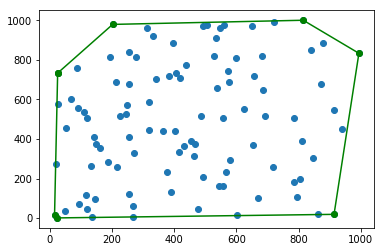

In [4]:
from utils import *
from numpy import random as rnd


def get_hull_points(list_pts, random=False):
    min_pt, max_pt = get_min_max_x(list_pts)
    left_of_line_pts, right_of_line_pts = split_by_line(min_pt, max_pt, list_pts)
    impl = random_quick_hull if random else quick_hull
    hull_pts = impl(left_of_line_pts, min_pt, max_pt)
    return hull_pts + impl(right_of_line_pts, max_pt, min_pt)


def split_by_line(start, end, points):
    left = []
    right = []
    for pt in points:
        pt_turn = turn(start, end, pt)
        if pt_turn == TURN_LEFT:
            left.append(pt)
        elif pt_turn == TURN_RIGHT:
            right.append(pt)
    return left, right


def point_max_from_line(start, end, points):
    max_dist = 0
    max_point = None
    for point in points:
        if point != start and point != end:
            dist = distance(start, end, point)
            if dist > max_dist:
                max_dist = dist
                max_point = point

    return max_point


def quick_hull(points, start, end):
    pivot = point_max_from_line(start, end, points)
    if pivot is None:
        return [end]
    left_of_first = get_points_left_of_line(start, pivot, points)
    right_of_second = get_points_left_of_line(pivot, end, points)

    hull_pts = quick_hull(left_of_first, start, pivot)
    hull_pts = hull_pts + quick_hull(right_of_second, pivot, end)

    return hull_pts


def merge_hulls(hull, other_hull):
    index = 0
    other_index = max(0, len(other_hull) - 2)
    while True:
        if index < len(hull) - 1 and turn(other_hull[other_index], hull[index], hull[index + 1]) == TURN_RIGHT:
            index += 1
        elif other_index >= 1 and turn(hull[index], other_hull[other_index], other_hull[other_index - 1]) == TURN_LEFT:
            other_index -= 1
        else:
            break
    result = other_hull[:other_index + 1] + hull[index:len(hull)]
    return result


def split_by_two_lines(points, start, pivot, end):
    first, second = [], []
    for p in points:
        if turn(start, pivot, p) == TURN_LEFT:
            first.append(p)
        elif turn(start, pivot, p) == TURN_RIGHT and turn(pivot, end, p) == TURN_LEFT:
            second.append(p)
    return first, second


def random_quick_hull(points, start, end):
    if points:
        pivot = points[rnd.randint(0, len(points))]
        left_of_first, left_of_second = split_by_two_lines(points, start, pivot, end)
        hull_pts = random_quick_hull(left_of_first, start, pivot) + [start]
        hull_pts = merge_hulls(hull_pts, random_quick_hull(left_of_second, pivot, end) + [pivot])
        return hull_pts[:len(hull_pts) - 1]
    else:
        return [end]


def get_points_left_of_line(start, end, points):
    pts = []
    for pt in points:
        if turn(start, end, pt) == TURN_LEFT:
            pts.append(pt)

    return pts


def get_min_max_x(list_pts):
    min_x = float('inf')
    max_x = 0
    min_y = 0
    max_y = 0

    for x, y in list_pts:
        if x < min_x:
            min_x = x
            min_y = y
        if x > max_x:
            max_x = x
            max_y = y

    return [min_x, min_y], [max_x, max_y]

# расстояние от pt до прямой, проходящей через start и end
# расстояние пропорционально площади треугольника построенного на  start, end, pt 
# (так как является его высотой), а площадь равна модулю поворота / 2
def distance(start, end, pt):
    return abs(turn_value(start, end, pt))


test = gen(n=100, max_coord=1000)
visualize(test, get_hull_points(test))


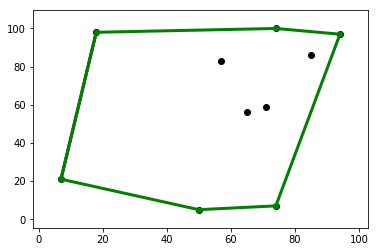

In [2]:
from quick_hull import QuickHullVisualiser
from utils import *
from IPython.display import HTML

HTML(QuickHullVisualiser(points=gen(), interval=1000).visualise().to_html5_video())

## Оболочка многоугольника
Дан многоугольник без самопересечений. Хотим найти для него выпуклую оболочку за линию.
### Описание
Сделаем обход Грэхема по многоугольнику, начиная с самой левой точки. Это займет $O(n)$ времени.
### Корректность

Не всегда является правдой то, что стек после $k$-ой итерации представляет собой список вершин
корректной выпуклой оболочки для $k − 1$ вершин &mdash; очередная вершина многоугольника может повернуть сильно назад, и после исключения неправильно повернутых вершин оболочка может перестать их
заключать.
![](images/polygon_hull_bad.svg)
На рисунке при добавлении точки $p_3$ к оболочке $p_0, p_1, p_2$ алгоритм удаляет вершину $p_2$, потому что $turn(p_1, p_2, p_3) = TURN\_RIGHT$, полученная оболочка не содержит $p_2$. <br>
Тем не менее, корректность не нарушается, т.к. выполняется другой инвариант.
> Алгоритм строит корректную выпуклую оболочку.

$\triangleright$
<div style="padding-left:40px">
Построенная на $k$-ом шаге оболочка является корректной выпуклой оболочкой для всех вершин, лежащих справа от ребра $p_0p_k$. Так как в многоугольнике нет
самопересечений, это ребро пройдет через любую точку нечетное количество раз, а значит, в конечном
итоге каждая точка войдет в выпуклую оболочку.
</div>
$\triangleleft$

# Оболочка полилинии
Простой полилинией называется ломаная не имеющая самопересечений.
Далее мы научимся строить выпуклую оболочку полилинии за $O(n)$
![Пример](images/polyline.png)



## Алгоритм Мелькмана

Заведем дек, в котором будут поддерживаться 2 инварианта:
1. Вершины в деке – это вершины корректной выпуклой оболочки для всех рассмотренных вершин.
2. Последняя рассмотренная вершина лежит спереди и сзади дека (если она принадлежит текущей
оболочке).

Изначально дек инициализируется первыми тремя вершинами полилинии (очевидно, корректно).
Далее идем по вершинам в том порядке, в котором они соединены полилинией и, в зависимости от положения очередной добавляемой точки, изменяем дек.

Пусть у нас была дана полилиния $P={p_1, p_2, \dots, p_9, \dots}$.
Пускай мы уже построили оболочку для вершин $p_1, p_2,\dots, p_8$. При добавлении очередной вершины $p_9$ возможны случаи:

![Пример](images/polyline_var.png)

Заметим, что добавляемая точка не может "спряться" от текущей головной вершины позади всей оболочки
из-за несамопересекаемости полилинии.

![Пример](images/polyline_no.png)

Как изменяется дек?
1. Если добавляемая точка оказалась в позиции 4 (внутри текущей оболочки), то ничего делать не надо. 
2. Если в позициях 1 или 3 – удаляем вершины с соответствующей стороны дека, пока не получится
корректный поворот.
3. В случае 2 удаляем по 1 вершине с обоих сторон дека.

В любом из случаев, в конце очередного шага необходимо положить эту вершину с обоих концов дека.

## Реализация

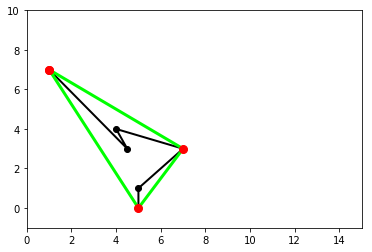

In [36]:
from collections import deque
from melkman import *
from utils import *


def melkman(points):
    d = deque(points[:min(len(points), 3)])
    # Если точек меньше 3, то нет смысла делать что-то дальше
    if len(d) < 3:
        return d
    d.appendleft(points[2])
    t = turn(points[0], points[1], points[2])
    if t == TURN_RIGHT:
        d[1], d[2] = d[2], d[1]
    #Идем по полилинии, обрабатывая новые вершины
    for i in range(3, len(points)):
        l = len(d)
        #Шаг первый: если очередная точка лежит внутри уже имеющейся оболочки, то пропускаем ее
        if turn(d[0], points[i], d[1]) == TURN_RIGHT and len(d) >= 2 and \
                        turn(d[-1], d[-2], points[i]) == TURN_RIGHT:
            continue
        # Точку, которая была последней на предыдущей итерации,
        # нужно удалить, чтобы она встречалась в деке 1 раз
        if turn(d[-1], d[-2], points[i]) == TURN_NONE:
            d.pop()
        #Шаг второй: если очередная точка лежит слева от прямой, образованной двумя крайними точками,
        #лежащими на правой границе дека, то модифицируем дек
        while len(d) >= 2 and turn(d[-1], d[-2], points[i]) == TURN_LEFT:
            d.pop()
            l -= 1
        #Добавляем текущую точку в правый конец дека
        d.append(points[i])

        #Шаг третий: как на втором шаге, только для левого конца дека
        while len(d) >= 2 and turn(d[0], points[i], d[1]) == TURN_LEFT:
            d.popleft()
        d.appendleft(points[i])
    return list(d)


#Здесь можно посмотреть примеры работы
#example_melkman[i], где i может принимать значения от 0 до 3 - номер примера
points = example_melkman[0]
plot_melkman(points, melkman(points))

## Корректность и время работы
Очевидно, что этот алгоритм работает за линейное время от количества точек в исходной полилинии, поскольку каждая вершина будет обработана (добавлена и удалена) один раз. 

Но почему алгоритм вообще работает? Для того, чтобы объяснить это, для начала вспомним свойства выпуклой оболочки $D$ для простой полигональной цепи $P$.
1. $D$ выпуклая
2. $P$ содержится в  $D$
3. Множество вершин, из которых состоит $D$ является подмножеством вершин полигональной цепи $P$

Доказательство корректности алгоритма строится на том, что следующее утверждение верно на протяжении обработки алгоритмом всей полилинии.

### Корректность
> Дек $ D=(d_b,d_{b+1},....d_{t-1},d_{t})$ при добавлении очередной вершины полилинии содержит в себе корректную выпуклую оболочку уже рассмотренных вершин<br>
 
$\triangleright$<br>
<div style="padding-left:40px">
    Докажем по индукции. <br>
<b>База:</b> Та часть алгоритма, которая находится перед циклом `for` гарантирует, что утверждение верно для трех вершин.<br>
<b>Переход:</b> Предположим, что утверждение верно для $k$ вершин.<br>
Для начала заметим, что все вершины, которые мы пропускаем на <b>первом шаге</b> находятся внутри уже построенной выпуклой оболочки. 
Фактически, мы пропускаем очередную вершину, если она находится справа от ориентированых векторов $\mathbf{d_b d_{b+1}}$ и $\mathbf{d_{t-1}d_t}$. Более того, так как мы рассматриваем полилинию, то вершины $d_t$ и $v$ соединены, и, поскольку наша полилиния простая, ребро $\mathbf{vd_t}$ не пересекает ту часть полилинии, которая находится между $d_{b+1}$ и $d_{t-1}$. Следовательно, $v$ должна лежать внутри полигона, состоящего из вершин лежащих в $D$. 

Если же мы не пропускаем очередную вершину, то для нее можно предположить, что верно  $turn(d_b,d_{b+1},v)=TURN\_RIGHT$ или $(d_{t-1},d_t,v)=TURN\_RIGHT$ (или оба), а значит для нее выполнятся <b>второй</b> или <b>третий шаги</b>(или оба). <br>
Теперь представим, что у нас был дек $D=(d_b,...d_t)$, и после обработки очередной вершины $v$ полилинии $P$   получился новый дек $\widetilde{D}=(d_k,\dots,d_m)$, где $d_k=d_m=v$. Давайте докажем, что вышеописанные <b>условия 1, 2</b> и <b>3</b> выполняются для $\widetilde{D}$, а значит, $\widetilde{D}$ является корректной выпуклой оболочкой.

Выполнение <b>условия 3</b> очевидно, поскольку мы строим $\widetilde{D}$ из вершин $P$.<br>
Легко понять, что уже рассмотренный кусок полилинии $P$ содержится в $\widetilde{D}$, поскольку он содержался в $D$,а на втором и третьем шаге мы удаляли из дека только в том случае, если текущая вершина дека $d_k$ образует левый поворот с векторами $\mathbf{d_{t-1} v}$ и $\mathbf{v d_{b+1}}$. Таким образом, выполнено <b>условие 2</b>.<br>
Чтобы доказать,  что $\widetilde{D}$ выпуклый, покажем, что он образует замкнутую простую кривую, такую, что для нее верно $turn(d_i,d_{i+1},d_{i+2})\neq TURN\_RIGHT$ для $i=k,\dots,m-2$, и $turn(d_{m-1},d_{m},d_{k+1})\neq TURN\_RIGHT$. Поскольку $D$ образовывал простую полилинию, то $\widetilde{D}$ может иметь самопересечения только в случае, если  $\mathbf{vd_{k+1}}$ и $\mathbf{d_{m-1}v}$ пересекают ребра той части полилинии, по которой был построен $D$, а такого не может быть, потому что сама $P$ изначально была простой. Тот же факт, что $turn(d_i,d_{i+1},d_{i+2})\neq TURN\_RIGHT$ для $i=k,\dots,m-2$, был уже изначально верен для $D$ и является результатом выполнения <b>шагов два</b> и <b>три</b>. <br>
Докажем от противного, что  $turn(d_{m-1},d_{m},d_{k+1})\neq TURN\_RIGHT$. Пусть $turn(d_{m-1},d_{m},d_{k+1})=TURN\_RIGHT$  тогда вершина $v=d_m$ должна находиться слева от ориентированного ребра $\mathbf{d_{m-1}d_{k+1}}$, и в то же время должна находиться по левую сторону от полилинии $(d_{k+1},\dots,d_{m-1})$. Значит, что $v$ находится внутри $D$, и должна была быть отброшена на <b>шаге один</b>. Таким образом, <b>условие 1</b> также выполнено.
</div>
$\triangleleft$